# Hackathon 2: Fuel consumption model

The amount of fuel a vehicle uses to travel a distance is defined as Fuel Consumption. Fuel Consumption is a significant factor to be optimized for enterprises and professionals of transportation to maximize profits and achieve better functionality of the enterprise. Predicting fuel consumption using only a few features will help managers to choose routes and times of transportation that will guide to an increased fuel economy. The raw dataset is available on Kaggle:

https://www.kaggle.com/yiorgos1973/fuelconsumption

The database (file fuelConsumptionhack2.csv) contains 4491 records with the following information a fleet of light trucks: 

Payload:  Describes the loaded cargo.

Reliability: Probability of this route to be on time according to historical data.

Season: Describes the weather condition. 0 is good weather and 1 is bad weather

Net: This is a discrete quantitative variable that describes the quality of the roadnet. 1 is bad quality, 2 is mediocre and 3 is good quality

LoadValue: This is the value of the cargo of the light truck

TransmissionType: Truck can have automatic or manual transmission.

Fuel: The dependent variable. It is describing the fuel consumption of a truck when doing this route (l/100km).

Your aim is to understand how the fuel consumption can be explained by other recorded features. You will use pandas, numpy to read the dataset.


In [41]:
import pandas as pd
data = pd.read_csv("fuelConsumptionhack2.csv",sep=";")
Pay = data["Payload"].values
Rel = data["Reliability"].values
Sea = data["Season"].values
Net = data["Net"].values
LV = data["LoadValue"].values
TT = data["TransmissionType"].values
Fuel = data["Fuel"].values

# Hypothesis testing
1) We start our analysis by checking that the average consumption is above 15 l/100km. To do this, perform a one-sided test for a confidence level of 95% (alpha=5%). Write clearly the tested assumptions and Report the statistics, critical value and the p-value. 

In [42]:
import numpy as np
import scipy.stats as sc

X    = Fuel[:]
n    = len(X)

# we get the statistics
Stat=sc.describe(X)
print("Mean:",Stat.mean,", Variance:", Stat.variance)

print("H0 : mu(Fuel) = 15\nH1 : mu(Fuel) > 15\n")

# we calculate T(X)
Tx= (Stat.mean-15)/np.sqrt(Stat.variance/n)

# we compare it to the percentiles of a t distribution
alpha = 0.05
t_u   = sc.t.ppf(q=1-alpha,df=n-1)
print("T(X): ",Tx)
print("Critical value: ",t_u)
print("We see that T(X) is above the critical value, hence we reject H0")

#The p-value is
pval = 1-sc.t.cdf(np.abs(Tx),df=n-1)
print("p-value:",pval, "< alpha (5%) => We confirm the rejection of H0")


Mean: 16.508159869000547 , Variance: 3.4078219088079567
H0 : mu(Fuel) = 15
H1 : mu(Fuel) > 15

T(X):  54.76172806719549
Critical value:  1.6451929157669274
We see that T(X) is above the critical value, hence we reject H0
p-value: 0.0 < alpha (5%) => We confirm the rejection of H0


2) We continue with an analysis of the transmission type on the average fuel consumption. Under the assumption of equal variances, test if the average consumption of automatic vehicles is the same as the one with a manual transmission (use a two-sided test and a confidence level of 95%, i.e. \alpha=5% ). Report the statistics, critical values and the p-value.

In [43]:
#dividing the set in two subsets based on the transmition
TT_auto=[Fuel[i] for i in range(len(Fuel)) if TT[i]=='automatic']
TT_man=[Fuel[i] for i in range(len(Fuel)) if TT[i]=='manual']
n1=len(TT_auto)
n2=len(TT_man)

#we get the statistics
X1=sc.describe(TT_auto)
X2=sc.describe(TT_man)
print('Automatic:',"Mean:",X1.mean,", Variance:",X1.variance )
print('Manual:',"   Mean:",X2.mean,", Variance:", X2.variance )

print("H0 : mu(Auto)-mu(Manual) = 0\nH1 : mu(Auto)-mu(Manual) is different from 0\n")

#We find the pool variance
Var_pool=X1.variance*n1/(n1+n2)+X2.variance*n2/(n1+n2)
print("Assumption : variance is the same for manual and automatic and equal to",Var_pool,"\n")

#we find the value of T(X1,X2)
alpha=0.05
Txy=(X1.mean-X2.mean)/np.sqrt(Var_pool*(1/n1+1/n2))
print("T(X1,X2):",Txy)
t_l = sc.norm.ppf(alpha/2)
t_u = sc.norm.ppf(1-alpha/2)
print("Critical values:",[t_l,t_u])

print("We see that T(X1,X2) is outside of the critical values interval, hence we reject H0")

#The p-value is
pval = 2*(1-sc.norm.cdf(np.abs(Txy)))
print("p-value:",pval, "< alpha (5%) => We confirm the rejection of H0")

Automatic: Mean: 16.42050764687532 , Variance: 3.2239692302077048
Manual:    Mean: 16.555655702471977 , Variance: 3.5021653593719293
H0 : mu(Auto)-mu(Manual) = 0
H1 : mu(Auto)-mu(Manual) is different from 0

Assumption : variance is the same for manual and automatic and equal to 3.4043973451386083 

T(X1,X2): -2.3439983931797244
Critical values: [-1.9599639845400545, 1.959963984540054]
We see that T(X1,X2) is outside of the critical values interval, hence we reject H0
p-value: 0.019078253589527083 < alpha (5%) => We confirm the rejection of H0


3) The test in question 2 is performed under the assumption of equal variances. Test this assumption with a confidence level of 95% (two-sided test, \alpha=5%). Report the values of statistics and the critical values (p-value not requested)

In [44]:
print('Automatic:',"Variance:", X1.variance )
print('Manual:',"Variance:", X2.variance )
print("H0 : sigma(Auto) = sigma(Manual)\nH1 : sigma(Auto) is different from sigma(Manual)\n")

#we find the value of T(X1,X2)
alpha=0.05
Txy=X1.variance/X2.variance
print("T(X1,X2):",Txy)
t_l = sc.f.ppf(alpha/2,dfn=n1-1,dfd=n2-1)
t_u = sc.f.ppf(1-alpha/2,dfn=n1-1,dfd=n2-1)
print("Critical values:",[t_l,t_u])

print("We see that T(X1,X2) is inside of the critical values interval, hence we do not reject H0")

Automatic: Variance: 3.2239692302077048
Manual: Variance: 3.5021653593719293
H0 : sigma(Auto) = sigma(Manual)
H1 : sigma(Auto) is different from sigma(Manual)

T(X1,X2): 0.9205645363318551
Critical values: [0.9164663405212443, 1.0899135647470608]
We see that T(X1,X2) is inside of the critical values interval, hence we do not reject H0


  4) Under the assumption of equal variances, test if the average consumption is the same with bad or good weather conditions (use a two-sided test and a confidence level of 95%, i.e. \alpha=5% ). Report  the statistics, critical values and the p-value.

In [45]:
#dividing the set in two subsets based on the weather
Good_W=[Fuel[i] for i in range(len(Fuel)) if Sea[i]==0]
Bad_W=[Fuel[i] for i in range(len(Fuel)) if Sea[i]==1]
n1=len(Good_W)
n2=len(Bad_W)

#we get the statistics
X1=sc.describe(Good_W)
X2=sc.describe(Bad_W)
print('Good weather:',"Mean:",X1.mean,", Variance:",X1.variance )
print('Bad weather:'," Mean:",X2.mean,", Variance:", X2.variance )

print("H0 : mu(Good W.)-mu(Bad W.) = 0\nH1 : mu(Good W.)-mu(Bad W.) is different from 0\n")

#We find the pool variance
Var_pool=X1.variance*n1/(n1+n2)+X2.variance*n2/(n1+n2)
print("Assumption : variance is the same for good and bad weather and equal to ",Var_pool,"\n")

#we find the value of T(X1,X2)
alpha=0.05
Txy=(X1.mean-X2.mean)/np.sqrt(Var_pool*(1/n1+1/n2))
print("T(X1,X2):",Txy)
t_l = sc.norm.ppf(alpha/2)
t_u = sc.norm.ppf(1-alpha/2)
print("Critical values:",[t_l,t_u])

print("We see that T(X1,X2) is outside of the critical values interval, hence we reject H0")

#The p-value is
pval = 2*(1-sc.norm.cdf(np.abs(Txy)))
print("p-value:",pval, "< alpha (5%) => We confirm the rejection of H0")

Good weather: Mean: 16.053005795731895 , Variance: 2.3596204431511048
Bad weather:  Mean: 19.165650013686328 , Variance: 1.256410059476164
H0 : mu(Good W.)-mu(Bad W.) = 0
H1 : mu(Good W.)-mu(Bad W.) is different from 0

Assumption : variance is the same for good and bad weather and equal to  2.198300785444798 

T(X1,X2): -49.72098227948306
Critical values: [-1.9599639845400545, 1.959963984540054]
We see that T(X1,X2) is outside of the critical values interval, hence we reject H0
p-value: 0.0 < alpha (5%) => We confirm the rejection of H0


# Linear regression
5) The next step consists to perform a linear regression of the variable “Fuel consumption” on all other explanatory variables.
i.	Report the F statistics and interpret it
ii.	What does measure the R2?
iii.	Analyze the t-statistics and p-values of coefficients of regression. Are all coefficients significant at 5%? Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).

(For each variable, we find :
R-squared : R2 ;
F-statistic : F statistic ;
t: t-statistic ;
P>|t| : p-value ;
const : beta0 ;
x1 : beta1)

Payload :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           1.98e-58
Time:                        15:42:25   Log-Likelihood:                -17537.
No. Observations:                4493   AIC:                         3.508e+04
Df Residuals:                    4491   BIC:                         3.509e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [

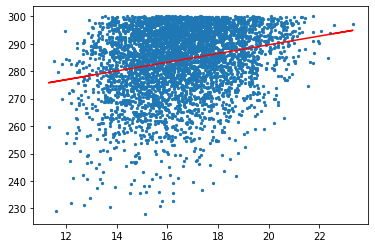

Reliability :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     8760.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:42:25   Log-Likelihood:                -12467.
No. Observations:                4493   AIC:                         2.494e+04
Df Residuals:                    4491   BIC:                         2.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.6504      0.521    22

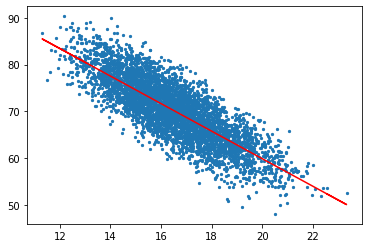

Season :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2472.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:42:26   Log-Likelihood:                -715.88
No. Observations:                4493   AIC:                             1436.
Df Residuals:                    4491   BIC:                             1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7366      0.038    -45.574

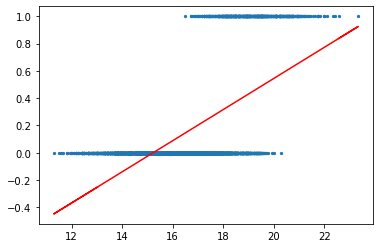

Net :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                 1.228e+04
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:42:26   Log-Likelihood:                -786.66
No. Observations:                4493   AIC:                             1577.
Df Residuals:                    4491   BIC:                             1590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6442      0.039    171.636   

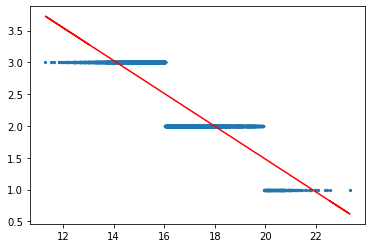

LoadValue :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     2227.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:42:26   Log-Likelihood:                -30268.
No. Observations:                4493   AIC:                         6.054e+04
Df Residuals:                    4491   BIC:                         6.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2138.6594     27.383     78.

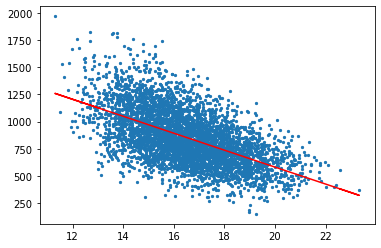

TransmitionType :
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.494
Date:                Thu, 05 Nov 2020   Prob (F-statistic):             0.0191
Time:                        15:42:26   Log-Likelihood:                -3050.6
No. Observations:                4493   AIC:                             6105.
Df Residuals:                    4491   BIC:                             6118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5007      0.064  

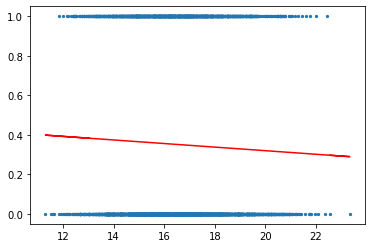

In [51]:
import scipy.stats as sc
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
TT2=[1 if TT[i]=='automatic' else 0 for i in range(len(TT))]
liste = [Pay,Rel,Sea,Net,LV,TT2]
liste2 =["Payload","Reliability","Season","Net","LoadValue",'TransmitionType']

print("(For each variable, we find :\nR-squared : R2 ;\nF-statistic : F statistic ;\nt: t-statistic ;\nP>|t| : p-value ;\nconst : beta0 ;\nx1 : beta1)\n")
for i in range(len(liste)):
    x = Fuel
    y = liste[i]
    x2 = sm.add_constant(x) 
    result = sm.OLS(y, x2).fit()
    print(liste2[i],':')
    print(result.summary().tables[0])
    print(result.summary().tables[1],'\n\n')
    plt.scatter(x, y,s=5)
    y_hat=result.params[0]+x*result.params[1]
    plt.plot(x,y_hat,'r')
    plt.show()

Answer : The F statistic can be interpreted as the explained variance on unexplained variance. It means that when the F statistic is too small then the linearity between X et Y must be rejected.<br />
R squared, the coefficient of determination, measures the quality of the linear regression. Its value is between 0 and 1. The closer to 1, the better the model.<br />


6) Remove non-significant coefficients and run again the regression. Compare the Log-likelihood, AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations).

7) We have treated categorical variables (Season, net, TransmissionType) as continuous explanatory variables. For binary variables as Season or TransmissionType (coded as 0-1), the coefficient of regression (\beta) represents the marginal impact of the Season or TransmissionType on fuel consumption. For categorical variables with more than 2 instances, like “net”, the \beta is not clearly interpretable. Imagine that we code net as : 1=mediocre, 2=good, 3=bad, we would obtain a totally different value for the beta because the coding of road quality has no natural order. In practice, non-binary categorical variable cannot by entered in the regression equation just as they are. We must recode them into several binary variables. For example, the variable NET is removed and split into 2 binary variables BAD and MEDIOCRE as follows:

If net=1 (bad quality): we replace it by BAD=1 , MEDIOCRE=0
If net=1 (mediocre quality): we replace it by BAD=0 , MEDIOCRE=1
If net=1 (good quality): we replace it by BAD=0 , MEDIOCRE=0

We do not add a binary variable for roads of good quality because it generates identifiability problems with the intercept beta_0. In general, a categorical variable with n instances in recoded as n-1 binary variables.

Recode the variable NET into two binary variables and rerun the regression.  Compare the Log-likelihood , AIC and BIC of this model with previous ones. (use drop() and insert() to remove/add columns to a dataframe).
